# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('/yulu_bike_sharing_dataset.csv')

In [3]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [4]:
df.shape

(10886, 19)

In [5]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,day,week,weekday_num,weekday,year,month,hour
datetime,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011-01-01,1,52,5,Saturday,2011,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,52,5,Saturday,2011,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011-01-01,1,52,5,Saturday,2011,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011-01-01,1,52,5,Saturday,2011,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011-01-01,1,52,5,Saturday,2011,1,4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       10886 non-null  int64  
 1   holiday      10886 non-null  int64  
 2   workingday   10886 non-null  int64  
 3   weather      10886 non-null  int64  
 4   temp         10886 non-null  float64
 5   atemp        10886 non-null  float64
 6   humidity     10886 non-null  int64  
 7   windspeed    10886 non-null  float64
 8   casual       10886 non-null  int64  
 9   registered   10886 non-null  int64  
 10  count        10886 non-null  int64  
 11  date         10886 non-null  object 
 12  day          10886 non-null  int32  
 13  week         10886 non-null  UInt32 
 14  weekday_num  10886 non-null  int32  
 15  weekday      10886 non-null  object 
 16  year         10886 non-null  int32  
 17  month        10886 non-null  int32  
 18  hour       

In [7]:
print(df.index.min())
print(df.index.max())
print(df.index.freq)
print(df.index.to_series().diff().value_counts())

2011-01-01 00:00:00
2012-12-19 23:00:00
None
datetime
0 days 01:00:00     10820
0 days 02:00:00        36
12 days 01:00:00       13
11 days 01:00:00        8
0 days 03:00:00         5
0 days 13:00:00         1
9 days 01:00:00         1
10 days 01:00:00        1
Name: count, dtype: int64


The dataset contains 10,886 records, covering the period from January 1, 2011 to December 19, 2012.

Granularity: each record corresponds to one hour.

The time axis is in hourly format — each row shows the number of bikes rented during a specific hour.

Time intervals between records are not uniform — there are missing timestamps in the data. Sometimes 1 or more hours are skipped; the maximum gap is up to 13 days between two entries.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


In [8]:
daily_counts = df['count'].resample('D').sum()

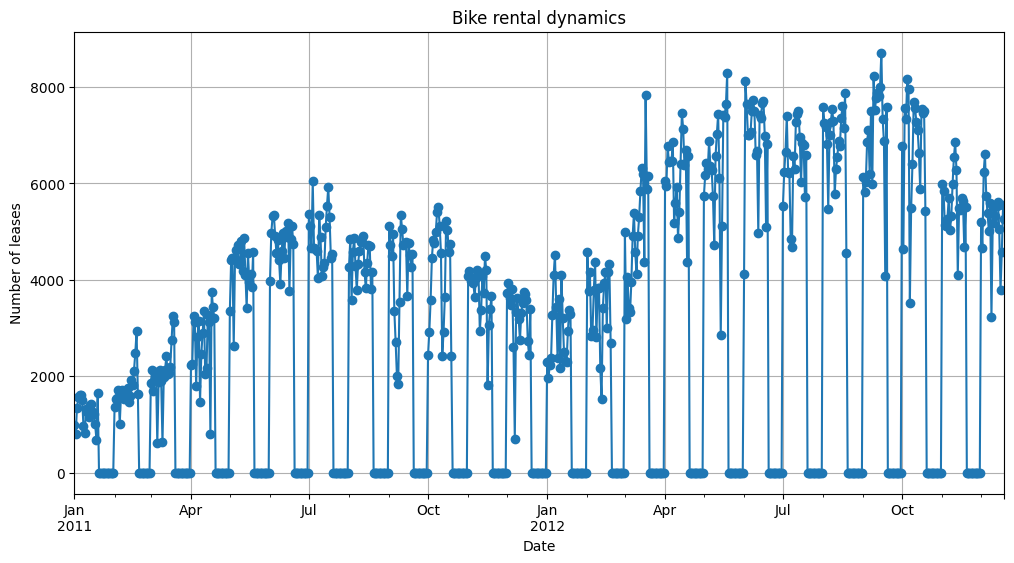

In [43]:
daily_counts.plot(
    marker='o',
    figsize=(12, 6),
    )

plt.title('Bike rental dynamics')
plt.xlabel('Date')
plt.ylabel('Number of leases')
plt.grid(True)

plt.show()

In [64]:
monthly_counts = df['count'].resample('ME').sum()

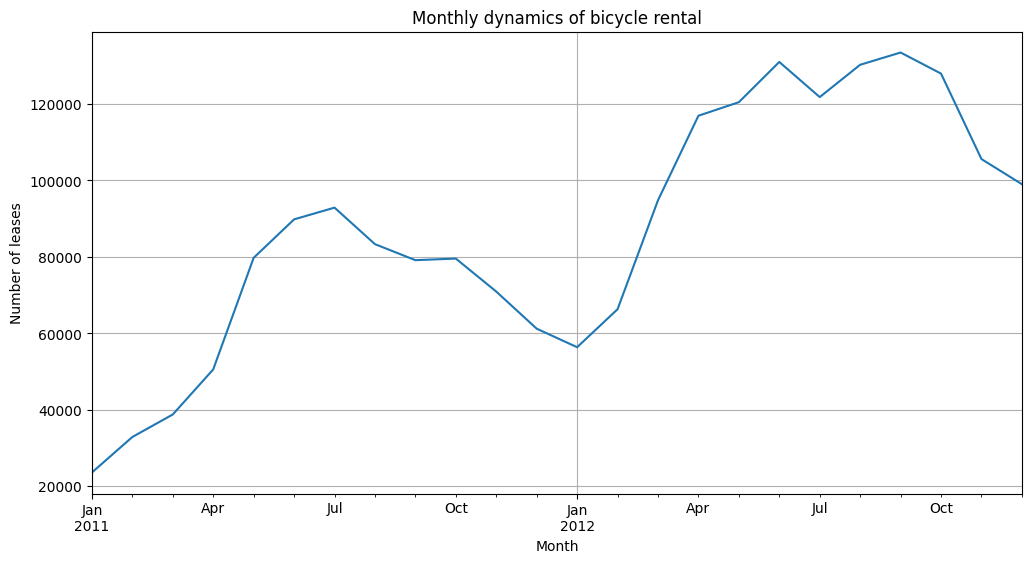

In [65]:
monthly_counts.plot(figsize=(12, 6))

plt.title('Monthly dynamics of bicycle rental')
plt.xlabel('Month')
plt.ylabel('Number of leases')
plt.grid(True)

plt.show()

1. The chart contains sharp drops ("spikes") to zero, indicating missing data or zero rentals during certain hours or days. This is caused by irregular data collection or days with no activity.

2. There is a general upward trend in bike rentals from early 2011 to mid-2012. Demand gradually increases, reaching a peak in the summer of 2012.

3. Сlear seasonality is observed:

- Spring — growth starts
- Summer — peak rentals
- Autumn — decline
- Winter — lowest activity

4.
- Regular drops to 0 — likely due to missing or incomplete data
- Exceptionally high values (>8000) — may be due to holidays, good weather, or promotions


## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

In [50]:
season_map = {
    1: 'Spring',
    2: 'Summer',
    3: 'Autumn',
    4: 'Winter'
}

df['season_name'] = df['season'].map(season_map)

In [51]:
season_avg = df.groupby('season_name')['count'].mean()

In [52]:
ordered_seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
season_avg = season_avg.reindex(ordered_seasons)

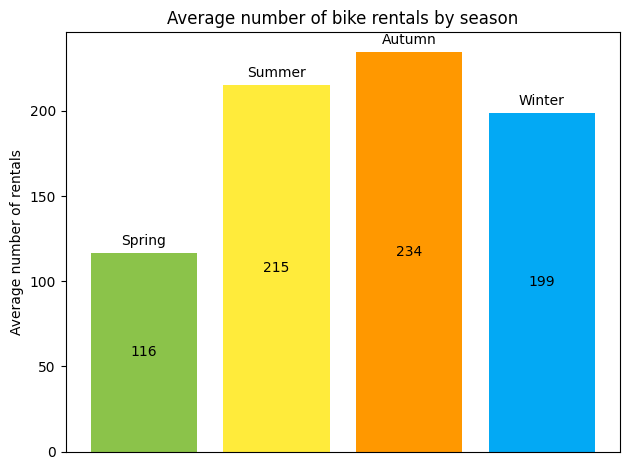

In [55]:
bars = plt.bar(
    x=range(len(season_avg)),
    height=season_avg.values,
    color=['#8BC34A', '#FFEB3B', '#FF9800', '#03A9F4'],
)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height / 2,
        f'{height:.0f}',
        ha='center',
        va='center',
        color='black',
        fontsize=10
    )

ordered_seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 3,
        ordered_seasons[i],
        ha='center',
        va='bottom',
        fontsize=10,
    )

plt.xticks([])

plt.title('Average number of bike rentals by season')
plt.ylabel('Average number of rentals')
plt.tight_layout()

plt.show()

In [93]:
top_season = season_avg.idxmax()
top_value = season_avg.max()
print(f"1. Highest number of rentals in: {top_season} ({top_value:.0f} rentals on average)")

1. Highest number of rentals in: Autumn (234 rentals on average)


2. Explanation of Seasonal Pattern:

In spring and summer, there is a noticeable increase in activity involving transportation such as bicycles. This trend is driven by favorable weather conditions — warmer temperatures, longer daylight hours — and more free time due to holidays, school breaks, and vacations. During these seasons, people tend to spend more time outdoors, move around the city more actively, and the number of tourists also increases. The bicycle becomes a convenient, affordable, and eco-friendly mode of transportation.

In [94]:
low_season = season_avg.idxmin()
ratio = top_value / season_avg.min()
print(f"3. Rentals in {top_season} are {ratio:.2f} times higher than in the least active season - {low_season}.")

3. Rentals in Autumn are 2.01 times higher than in the least active season - Spring.


## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [14]:
months_labels = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']

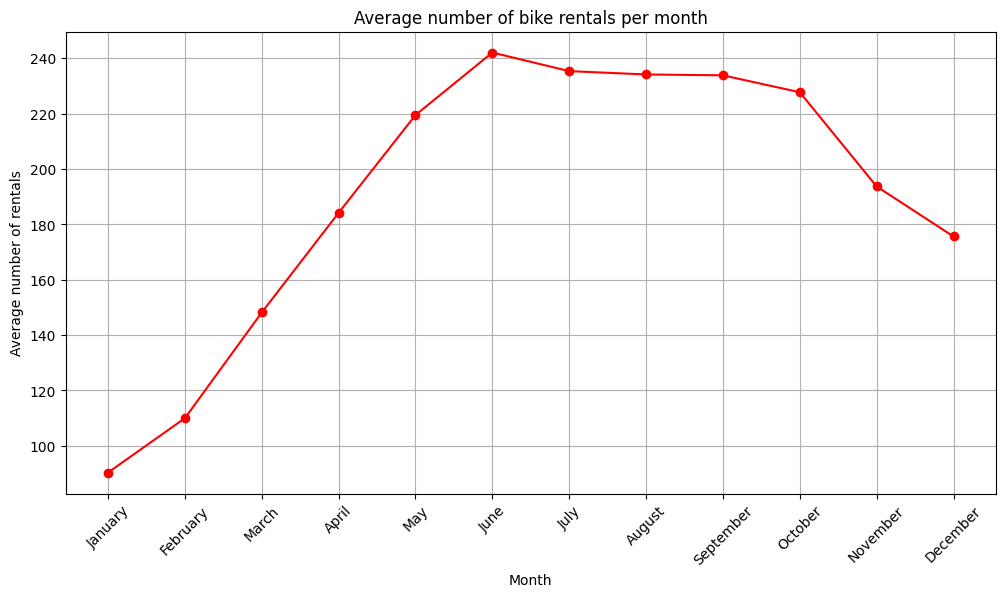

In [75]:
monthly_avg = df.groupby('month')['count'].mean()
monthly_avg.plot(
    figsize=(12, 6),
    color='red',
    marker='o',
    linestyle='-',
)

plt.title('Average number of bike rentals per month')
plt.xlabel('Month')
plt.ylabel('Average number of rentals')

plt.xticks(
    ticks=range(1, 13),
    labels=months_labels,
    rotation=45)
plt.grid(True)

plt.show()

In [77]:
peak_month = monthly_avg.idxmax()
lowest_month = monthly_avg.idxmin()

print(f"Peak rental: {months_labels[peak_month - 1]} ({monthly_avg[peak_month]:.0f} rentals)")
print(f"Lowest rental: {months_labels[lowest_month - 1]} ({monthly_avg[lowest_month]:.0f} rentals)")

Peak rental: June (242 rentals)
Lowest rental: January (90 rentals)


1. From the chart, the peak of rentals is observed in June, with an average exceeding 240 rentals. High values are also seen in May, July, and August.
The lowest activity is in January and February, where the averages are around 90–110.

2. Partially. In the previous chart ("Average number of bike rentals by season"), the highest number of rentals was observed in spring, whereas in this chart of monthly averages, the peak occurs in June (early summer). This discrepancy can be explained by different aggregation approaches:

- In the first case, we analyzed daily totals, where spring may have had more active days overall;
- In this chart, we look at average rentals per month, where June might have had the highest daily averages, even if the total volume was slightly lower than in spring.

3. Weather conditions may also play a role — for example, May–June may have been warmer or drier, encouraging more daily rentals.
Climate has a significant impact on rental numbers. During warmer months (spring–summer), the weather is more favorable for biking: it's dry, warm, and the daylight lasts longer.
In contrast, during colder months (winter), rentals drop due to low temperatures, short daylight, precipitation (snow, rain), and unsafe road conditions.
Also, in summer, people are more likely to go out, travel, or choose biking as a healthy and convenient form of transportation.



## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

In [81]:
weather_map = {
    1: 'Clear',
    2: 'Foggy',
    3: 'Light rain',
    4: 'Heavy rain'
}

In [82]:
df['weather_desc'] = df['weather'].map(weather_map)

In [83]:
daily_weather = df.groupby(df.index.date)['weather_desc'].agg(lambda x: x.mode()[0])
weather_counts = daily_weather.value_counts()
weather_counts

,count
weather_desc,
Clear,348
Foggy,91
Light rain,17


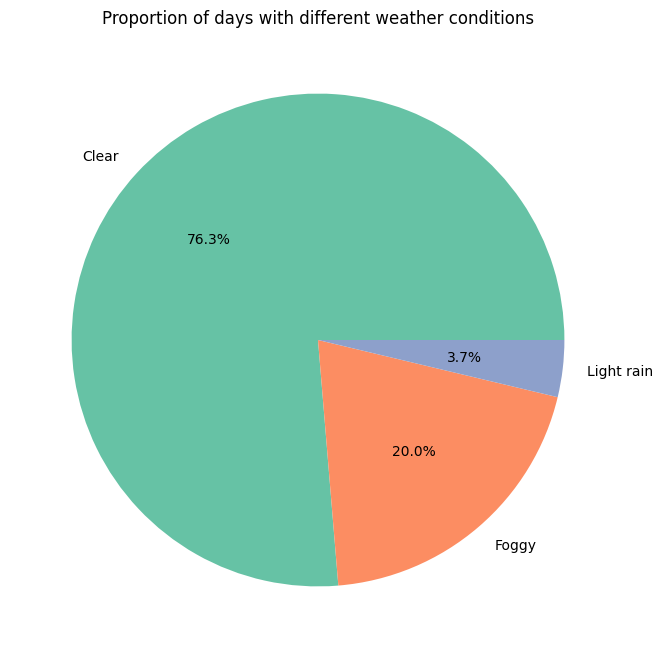

In [85]:
weather_counts.plot.pie(
    figsize=(8, 8),
    labels=weather_counts.index,
    autopct='%1.1f%%',
    colors=plt.cm.Set2.colors
)

plt.title('Proportion of days with different weather conditions')
plt.ylabel(''),

plt.show()

1. The weather was mostly clear (76,3%), which is typical and favorable for renting bicycles.

In [92]:
strong_rain_days = weather_counts.get('Сильний дощ', 0)
strong_rain_percent = strong_rain_days / weather_counts.sum() * 100
print(f"2. Days with heavy rain: {strong_rain_days} ({strong_rain_percent:.1f}%)")

2. Days with heavy rain: 0 (0.0%)


3. Weather conditions have a direct and significant impact on user behavior and bike rental demand:

Clear weather:

- Highest demand.
- People actively use bikes: comfortable temperatures, good visibility, pleasant overall conditions.
- Ideal for commuting and leisure.
- Often associated with peak rental days.

Foggy:

- Slight decrease in demand.
- Visibility drops, especially in the morning, but overall conditions remain tolerable.
- Many people still rent bikes, especially daily commuters.

Light rain:

- Noticeable drop in demand.
- Biking becomes less convenient and safe: wet roads, wet clothing, discomfort.
- Users are more likely to choose public transport or other alternatives.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

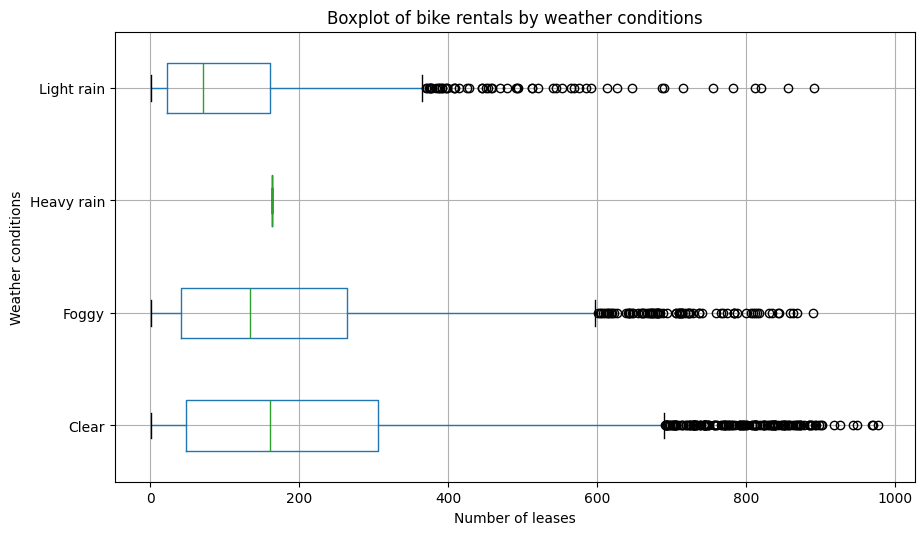

In [89]:
df.boxplot(
    column='count',
    by='weather_desc',
    vert=False,
    figsize=(10, 6),
    #colors=plt.cm.Set2.colors
)

plt.title('Boxplot of bike rentals by weather conditions')
plt.xlabel('Number of leases')
plt.ylabel('Weather conditions')
plt.suptitle('')

plt.show()

1. The largest spread in rental counts is observed during clear weather.
This indicates that rentals can vary widely on clear days — from very low to very high — depending on other factors like weekday, temperature, or season.

2. There are outliers for almost all weather types. These outliers suggest that demand sometimes deviates sharply from the norm, possibly due to events, holidays, or user behavior anomalies.

3. The highest median rental count is also seen during clear weather.
This is expected, as good weather encourages people to rent bikes more often.

Clear weather not only brings the highest median rental counts, but also the widest spread — indicating that both regular and casual users are active.
During rain or fog, rentals decrease, but some unusual high-demand days (outliers) still appear.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

/tmp/ipython-input-90-2676177340.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Season')


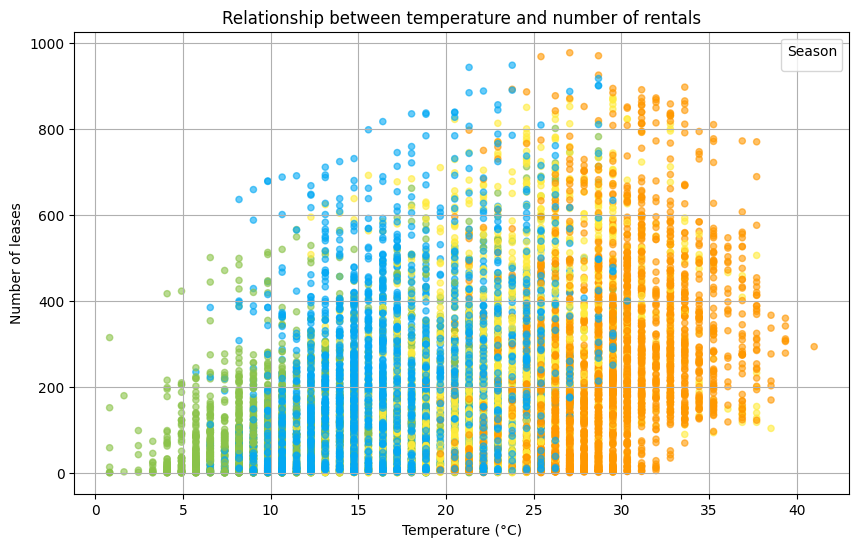

In [90]:
# Колірна мапа для сезонів
season_colors = {
    1: '#8BC34A',
    2: '#FFEB3B',
    3: '#FF9800',
    4: '#03A9F4'
}

# Створюємо нову колонку з кольорами
df['color'] = df['season'].map(season_colors)

# Візуалізація: розсіювальний графік
ax = df.plot.scatter(
    x='temp',
    y='count',
    c=df['color'],
    alpha=0.6,
    figsize=(10, 6)
)

ax.set_title('Relationship between temperature and number of rentals')
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Number of leases')
plt.legend(title='Season')

ax.grid(True)

plt.show()

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

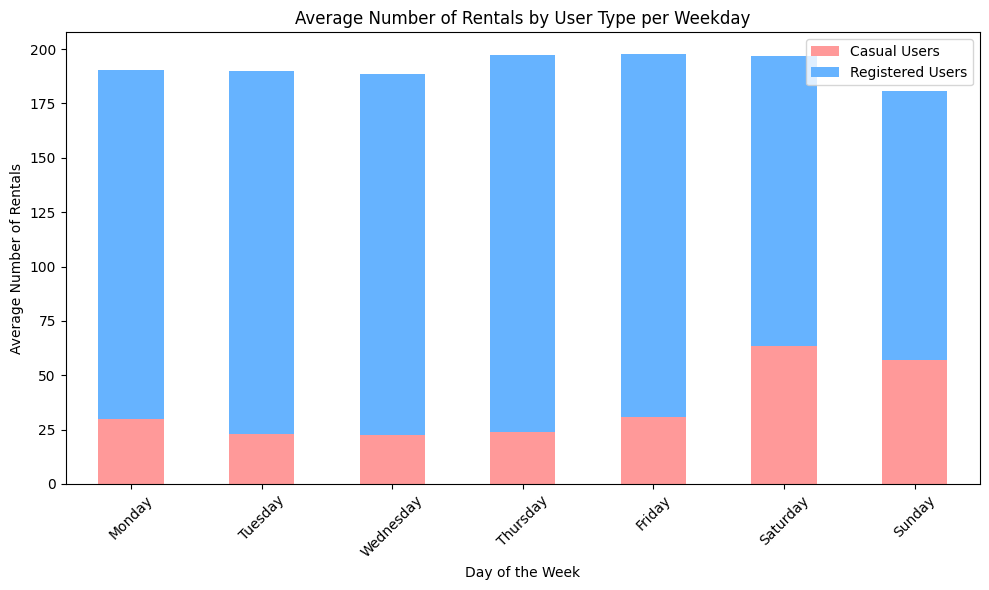

In [91]:
# Додамо назви днів тижня
df['weekday'] = df.index.day_name()

# Групуємо і обчислюємо середнє по днях тижня
avg_by_weekday = df.groupby('weekday')[['casual', 'registered']].mean()

# Сортуємо дні тижня в порядку з Пн по Нд
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_by_weekday = avg_by_weekday.loc[ordered_days]

# Побудова stacked bar
avg_by_weekday.plot(
    kind='bar',
    stacked=True,
    color=['#ff9999', '#66b3ff'],
    figsize=(10, 6)
)

plt.title('Average Number of Rentals by User Type per Weekday')
plt.xlabel('Day of the Week')
plt.ylabel('Average Number of Rentals')
plt.legend(['Casual Users', 'Registered Users'])

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

1. The highest number of rentals by registered users occurs on weekdays, particularly from Monday to Friday. This is evident from the chart, where rentals by registered users significantly exceed those of casual users during the working week.
Their activity notably decreases on weekends.

2. This difference is explained by the distinct usage patterns of the two user groups:

- Registered users are usually local residents who use bikes as a daily means of transportation — for commuting to work or school. Their activity peaks during the working days, when structured travel is more common.
- Casual users, on the other hand, are often tourists, leisure riders, or occasional users. They tend to rent bikes more during weekends, when they have free time for relaxation or recreational rides.